# 5.3 회귀분석

In [6]:
# 필요 라이브러리 로딩
import numpy as np
import pandas as pd
from scipy import stats # scipy: 수학 , 과학, 공학에 특화된 라이브러리 , 피어슨 , 스피어만 상관계수 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm # 회귀분석

In [7]:
# 보스턴 자료
data = pd.read_excel('D:/KTdata/boston.xls')
hdata = pd.DataFrame(data)
df_house = hdata.copy()

데이터 로딩

In [8]:
df_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


단순 회귀

        MEDV = B0 + B1 * LSTAT + e
- 종속변수: MEDV
- 독립변수: LSTAT


산점도로 변수간 관계 파악 

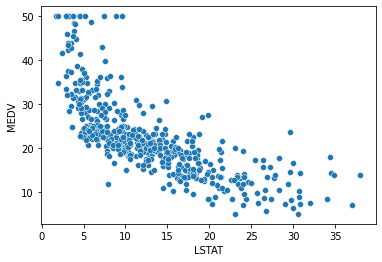

In [9]:
# 두 변수간 관계파악을 위해 산점도 
sns.scatterplot(x=df_house['LSTAT'],y=df_house['MEDV'])
plt.show()

LSTAT와 MEDV는 비선형 패턴이 있음을 확인 할 수 있음

In [10]:
# 종속변수와 독립변수 설정 
MEDV = df_house['MEDV'].values
LSTAT = df_house['LSTAT'].values

독립변수에 상수항 결합

In [12]:
# 회귀모형 수식을 간단하게만들기 위해 상수항을 독립변수에 추가
# 상수항이 결합되면 원소가 1인 데이터가 추가됨
# 상수항이 결합되어야 가중치(Beta_0)가 행렬곱으로 들어왔을때 살아남을 수 있음 --> 수식이 매우 간단해짐
# 일반적으로 선형회귀는 늘 상수항 결합을 함

LSTAT = sm.add_constant(LSTAT)
LSTAT

array([[1.  , 4.98],
       [1.  , 9.14],
       [1.  , 4.03],
       ...,
       [1.  , 5.64],
       [1.  , 6.48],
       [1.  , 7.88]])

단순선형 회귀분석 

In [13]:
linear_mod = sm.OLS(MEDV,LSTAT) # statsmodels의 OLS를 이용하여 종속변수, 독립변수를 인수로 추가 

In [14]:
linear_mod # 인스턴스

In [15]:
linear_result = linear_mod.fit()# linear_mod 의 결과 확인을 위해 fit 매소드 활용
linear_result

In [16]:
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.08e-88
Time:                        12:23:05   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [17]:
np.sqrt(linear_result.fvalue) # == abs(t-통계량)

24.52789985118774

In [19]:
#R 스타일로 리그레션 하고 싶다면 from_formule를 이용
linear_mod = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_house)
linear_result = linear_mod.fit()

In [21]:
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.08e-88
Time:                        12:27:49   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

- 동일 종속변수와 독립변수에 대해 sm.OLS 와 sm.OLS.from_formula를 이용한 회귀분석 결과값은 동일하다 

잔차 확인

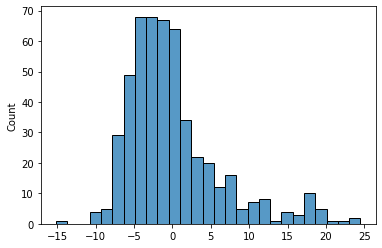

In [22]:
# 잔차의 분포 확인 
sns.histplot(linear_result.resid)
plt.show()

### 선형화를 통한 회귀분석

#### 상관관계 및 분포 확인

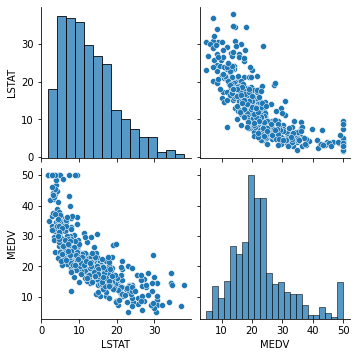

In [23]:
# 하위 계층 비율과 집 거래 중앙값 관계 확인
sns.pairplot(df_house[['LSTAT','MEDV']])
plt.show()

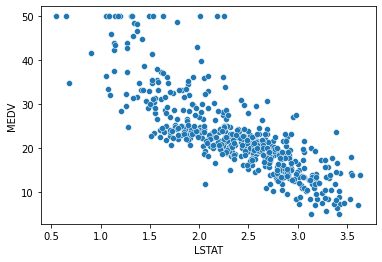

In [24]:
# LSTAT 의 log 변환
sns.scatterplot(x=np.log(df_house['LSTAT']) , y=df_house['MEDV'])
plt.show()

회귀 분석

$$ MEDV = b0 + b1log(LSTAT) + e $$

In [25]:
# 로그 변환 후 회귀분석 진행
log_linear_mod = sm.OLS.from_formula('MEDV ~ np.log(LSTAT)', data= df_house)
log_linear_result = log_linear_mod.fit()

In [26]:
print(log_linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          9.28e-122
Time:                        13:54:25   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004

- 로짓 변화후 결정계수(모델 설명력)이 증가함

잔차 확인

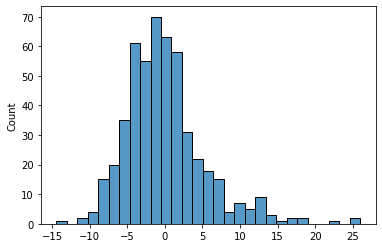

In [28]:
# 잔차의 분포 확인 
sns.histplot(log_linear_result.resid)
plt.show()

## 2차 회귀 분석 (Quadratic Regression Model)


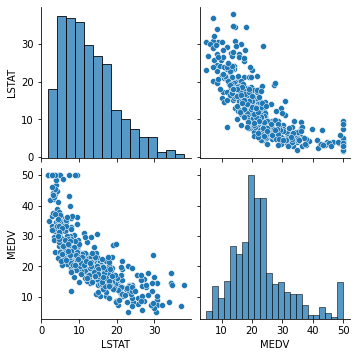

In [31]:
# 하위 계층 비율과 집 거래 중앙값 관계 확인
sns.pairplot(df_house[['LSTAT','MEDV']])
plt.show()

두 변수수간 커브 모양의 관계가 형성되어있다
이를 고려하기 위해 LSTAT 변수의 2차항을 추가

In [32]:
# 2차 회귀 분석 모델 설정
quadratic_mod = sm.OLS.from_formula('MEDV ~ LSTAT + I(LSTAT**2)',data=df_house) # LSTAT의 제곱값 추가
quadratic_result = quadratic_mod.fit()

In [34]:
# 결과 테이블 출력
print(quadratic_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.56e-112
Time:                        14:02:23   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

### 잔차 확인 

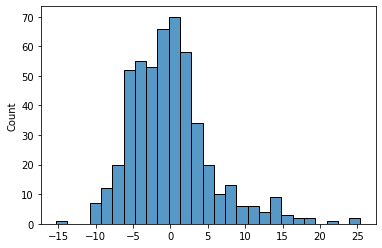

In [36]:
# 잔차의 분포 확인 
sns.histplot(quadratic_result.resid)
plt.show()

### 3개 모델 결과 비교(선형 vs 로그-리니어 vs 2차회귀)


In [37]:
print('R squared of linear model -->',np.round(linear_result.rsquared,2))
print('R squared of log- linear model -->',np.round(log_linear_result.rsquared,2))
print('R squared of quadratic model -->',np.round(quadratic_result.rsquared,2))

R squared of linear model --> 0.54
R squared of log- linear model --> 0.66
R squared of quadratic model --> 0.64


## 다중 회귀(multiple Regression)

#### 방 갯수를 알려주는 RM 변수 추가하여 분석을 진행

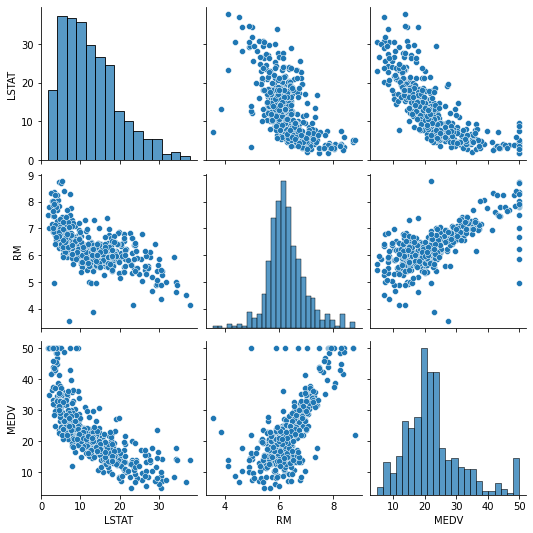

In [38]:
sns.pairplot(df_house[['LSTAT','RM','MEDV']])
plt.show()

In [39]:
# RM 변수 추가시 두가지 옵션, 이미 평균값이기에 수치형으로도 볼 수 있음, 그리고 선형성을 보여줌
# 하지만 엄밀히 말하자면 범주형 변수명, 한개 두개 세개 네개... 2.5개와 같은 실수는 취할 수 없음 >> 이때 binning처리 가능하지만 실습에선 하지 않음

multi_model  = sm.OLS.from_formula("MEDV ~ RM + LSTAT + I(LSTAT**2)",data= df_house)
multi_result = multi_model.fit()

In [40]:
print(multi_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     396.2
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          6.50e-132
Time:                        14:09:31   Log-Likelihood:                -1533.0
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     502   BIC:                             3091.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.6896      3.138      3.725

잔차 확인

<Axes: ylabel='Count'>

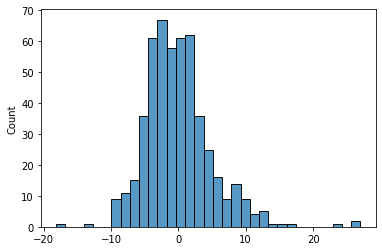

In [41]:
sns.histplot(multi_result.resid)

로그항 추가(2차항 제거)

In [43]:
multi_model2  = sm.OLS.from_formula("MEDV ~ RM + np.log(LSTAT)",data= df_house)
multi_result2 = multi_model2.fit()

In [44]:
print(multi_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     607.2
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          7.40e-135
Time:                        14:12:06   Log-Likelihood:                -1529.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     503   BIC:                             3078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.8865      3.552      6.443

잔차 확인

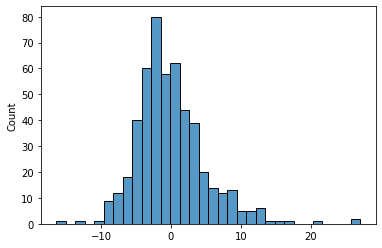

In [45]:
sns.histplot(multi_result2.resid)
plt.show()

성능 확인

In [46]:
print('R squared of Multiple Regression (2차항 포함)-->',np.round(multi_result.rsquared,2))
print('R squared of Multiple Regression (로그 변환항 포함)-->',np.round(multi_result2.rsquared,2))


R squared of Multiple Regression (2차항 포함)--> 0.7
R squared of Multiple Regression (로그 변환항 포함)--> 0.71


In [47]:
# 기존 성능
print('R squared of linear model -->',np.round(linear_result.rsquared,2))
print('R squared of log- linear model -->',np.round(log_linear_result.rsquared,2))
print('R squared of quadratic model -->',np.round(quadratic_result.rsquared,2))

R squared of linear model --> 0.54
R squared of log- linear model --> 0.66
R squared of quadratic model --> 0.64


- 데이터의 독립변수와 종속변수간 분포등 성질을 파악해서 분석 모델을 잘 선택해서 회귀분석을 수행 (2차항 vs log 변환 vs 단순회귀 등)